In [18]:
# upload dices_test folder
!pwd

/content


In [15]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import cv2
from skimage import img_as_ubyte

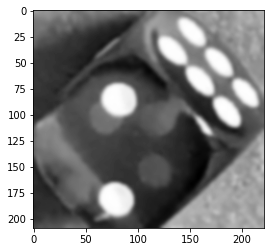

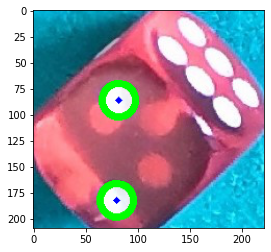

Number of dots on this dice:  2


In [17]:
# Read image and convert to grayscale.
img = skio.imread('dices_test/test22.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(m,n,j) = img.shape

gray_blurred = cv2.GaussianBlur(gray, (9, 9), 0)
plt.imshow(gray_blurred,cmap='gray')
plt.show() 

# detect circles with Hough transform
detected_circles = cv2.HoughCircles(gray_blurred,
                   cv2.HOUGH_GRADIENT, 1, int(min((m,n))/10), param1=100, param2=30,
                   minRadius = 1, maxRadius = int(max((m,n))/3))

# draw circles that are detected
if detected_circles is not None:
    # extract the circle parameters a, b and r (coordinates and radius)
    detected_circles = np.uint16(np.around(detected_circles))
    fig, ax = plt.subplots()
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(img, (a, b), r, (0, 255, 0), 5)
        # draw a small circle (of radius 1) to show the center
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2.waitKey(0)

plt.imshow(img)
plt.show() 

print("Number of dots on this dice: ", detected_circles.shape[1])

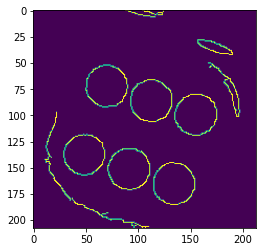

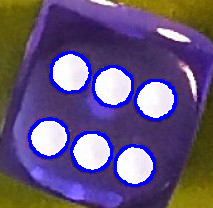

In [19]:
img = skio.imread('dices_test/test11.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 350)
plt.imshow(edged)
plt.show() 
cnts, hier  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

idx = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)

contour_list = []
for contour in cnts:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    # this condition in the future should also depend on size/proportion of the image
    if ((len(approx) < 20) & (area > 500) ):
      contour_list.append(contour)

from google.colab.patches import cv2_imshow
cv2.drawContours(img, contour_list,  -1, (255,0,0), 2)
cv2_imshow(img)


/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


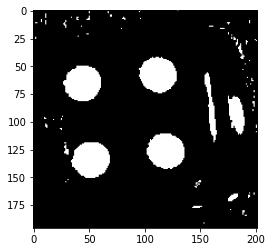

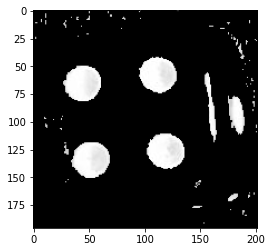

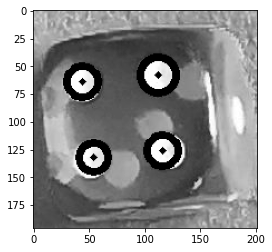

Number of dots on this dice:  4


In [20]:
img = cv2.imread('dices_test/test33.jpeg', cv2.IMREAD_GRAYSCALE)

bin_img = img < 0.8*np.max(img)
new_bin_img = 2**bin_img % 2
masked_image = img_as_ubyte(img*new_bin_img)
plt.imshow(new_bin_img,cmap='gray')
plt.show()
plt.imshow(masked_image,cmap='gray')
plt.show()


# detect circles with Hough transform
detected_circles = cv2.HoughCircles(masked_image,
                   cv2.HOUGH_GRADIENT, 1, int(min((m,n))/10), param1=50, param2=18,
                   minRadius = 0, maxRadius = int(max((m,n))/3))

if detected_circles is not None:
    # extract the circle parameters a, b and r (coordinates and radius)
    detected_circles = np.uint16(np.around(detected_circles))
    fig, ax = plt.subplots()
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(img, (a, b), r, (0, 255, 0), 5)
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2.waitKey(0)

plt.imshow(img,cmap='gray')
plt.show() 

print("Number of dots on this dice: ", detected_circles.shape[1])